In [ ]:
# import ray
# runtime_env = {"working_dir": "/home/bdp23/work/ahmad/german_analysis_after_tfidf", "pip": ["numpy"]}

# # Check if Ray is initialized and shut it down if it is
# if ray.is_initialized():
#     ray.shutdown()

# ray.init("ray://localhost:10001", runtime_env=runtime_env)

In [ ]:
# ray.is_initialized()

In [ ]:
# cluster_resources = ray.cluster_resources()
# print("Cluster resources:", cluster_resources)

In [ ]:
# node_info = ray.nodes()
# print("Node info:")
# for node in node_info:
#     print("Node ID:", node["NodeID"])
#     print("Node IP:", node["NodeManagerAddress"])
#     print("Node resources:", node["Resources"])
#     print("--------")


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/MyDrive/NLP_project4')

In [3]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [18]:
# !pip install https://huggingface.co/spacy/de_core_news_md/resolve/main/de_core_news_md-any-py3-none-any.whl
# !pip install https://huggingface.co/spacy/fr_core_news_md/resolve/main/fr_core_news_md-any-py3-none-any.whl
!pip install wheel
!pip install bertopic
!pip install nltk
!pip install scikit-learn
!pip install sentence-transformers
!pip install cudf-cu11 cuml-cu11 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 59.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 104.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [ ]:
# %pip install spacy

In [4]:
import spacy
import os
import json
import pandas as pd
# from conllu import parse
import pickle

In [ ]:
# def read_conllu(file):
#     """
#     open txt file in CoNLL-U format, and parse it with conllu package
#     Input: Text-file in CoNLL-U format (.txt)
#     Output: TokenList
#     """
#     with open(file, encoding = 'utf-8') as f:
#         txt = f.read() 
#     parsed_data = parse(txt)
#     return parsed_data

In [ ]:
# def create_article(token_list):
#     """
#     creates list of tokens for one article, uses list compreshension to get words
#     Input: TokenList
#     Output: list
#     """
#     article = []
#     for sentence in token_list:
#         tokens = [token['form'] for token in sentence]
#         article.extend(tokens)
#     return article

In [ ]:
# def stringify(list):
#     # This function joins all tokens in a list to a string
#     return " ".join(list)

In [ ]:
# def filepaths_newspaper(directory):
#     """
#     Helper function to get filepaths for data loading, depends on original file structure:
#     --> Newspaper / year / subdir / articles.txt
#     Input: path to directory, i.e. path until newspaper short name
#     Output: dictionary with paths, packaged by year
#     """
#     paths = {}
#     years = os.listdir(directory)
#     for year in years:
#         sub_directories = os.listdir(os.path.join(directory, year))
#         paths[year] = []
        
#         for subdir in sub_directories:
#             files = [os.path.join(directory, year, subdir, file) for file in os.listdir(os.path.join(directory, year, subdir)) if file.endswith(".txt")]
#             paths[year].extend(files)
            
#     return paths

In [ ]:
# def read_files(paths):
#     """
#     Function that reads and processes the articles for one specific newspaper
#     If files are corrupted and yield a ParsingError, the filepath is saved in the errors list
#     Input: dictionary with paths to all files, divided by year (keys)
#     Output: dictionary packaged by years, containing 2-d array with lists of tokens (one list per article), error list
#     """
#     corpus = {}
#     errors = []
#     print('\n ---  start loading ---')
    
#     for year in paths.keys():
#         corpus[year] = []
        
#         for file in paths[year]:
#             try:
#                 data = read_conllu(file)
#                 article = create_article(data)
#                 corpus[year].append(article)
                
#             except:
#                 print('error in: ', file)
#                 erros.append(file)
                
#         print(year, ' processed')
    
#     print('---  completed loading ---')
    
#     return corpus, errors

In [ ]:
# def save_corpus(corpus_newspaper, filename):
#     """
#     This function saves a newspaper corpus to a json file
#     Input: dictionary like corpus, filename: name.json
#     Output: json file
#     """
#     with open(filename, "w") as outfile:
#         json.dump(corpus_newspaper, outfile)
        
#     print('--- completed saving: ', filename, '---')

In [ ]:
# def read_json_corpus(path):
#     """
#     This function reads a newspaper corpus from json file
#     Input: path to json file
#     Output: dictionary
#     """
#     with open(path, "r") as json_file:
#         data = json.load(json_file)
        
#     return data

In [ ]:
# def create_dataframe(data_dict, newspaper):
#     """
#     This function creates a pandas df out of a dictionary like corpus produced by read_files()
#     Input: dict like, json or python dict
#     Output: Pandas df
#     """
#     # Extract keys (years) and values (2-dimensional lists) from the dictionary
#     years = []
#     texts = []
#     for year, values in data_dict.items():
#         for value in values:
#             years.append(year)
#             texts.append(value)
    
#     # Create a dataframe using pandas
#     df = pd.DataFrame({'text': texts, 'year': years, 'newspaper': newspaper})
    
#     return df

In [6]:
german_newspapers=['NZZ',  'BZ', 'BU', 'BAZ', 'TA']

In [7]:
french_newspapers=['TLM', 'TDG','HEU','TPS']

In [ ]:
# dfs = []
# for media in german_newspapers:
#     data = read_json_corpus(f'{media}.json')
#     df = create_dataframe(data, media)
#     del data
#     dfs.append(df)
# # create full dataframe with german newspapers
# df_full_german = pd.concat(dfs, axis = 0)
# df_full_german.head(10)

In [ ]:
# dfs = []
# for media in french_newspapers:
#     data = read_json_corpus(f'{media}.json')
#     df = create_dataframe(data, media)
#     del data
#     dfs.append(df)
# # create full dataframe with french newspapers
# df_full_french = pd.concat(dfs, axis = 0)
# df_full_french.head(10)

In [ ]:
#The undersampled DATA: 5(german newspapers)* 200(articles) * 25 (years not including 1996, 1997 )

In [44]:
# # Load the CSV file into a DataFrame
# undersampled_data = pd.read_csv('undersampled_data_german.csv')


# Load undersampled data from the pickled object
with open('df_bank_german_tfidf.pkl', 'rb') as f:
    undersampled_data_german = pickle.load(f)

# Now you can work with the loaded DataFrame
# For example, you can print the first few rows:
print(undersampled_data_german.head(10))

                                                 text  year newspaper
0   er er_old ge einkommen allg  steuern de ds rei...  1996       BAZ
1   er er_old ge korruption  bank allg wirtschafts...  1996       BAZ
3   er er_old ge fussball de ds fussball  soccer d...  1996       BAZ
4   er er _old ge wirtschaftskriminalität  kapital...  1996       BAZ
6   er er_old ge versicherung de ds lebensversiche...  1996       BAZ
7   er er _old ge fernsehanstalt  fernsehprogramm ...  1996       BAZ
8   er er_old ge staatsverfassung  ahv  sozialvers...  1996       BAZ
9   er er_old at übersicht ge fussball  fernsehpro...  1996       BAZ
10  er er _old ge wirtschaftskriminalität  kapital...  1996       BAZ
11  er er_old ge eislaufen de ds eiskunstlauf  eis...  1996       BAZ


In [45]:
# # Load the CSV file into a DataFrame
# undersampled_data = pd.read_csv('undersampled_data_german.csv')


# Load undersampled data from the pickled object
with open('df_bank_french_tfidf.pkl', 'rb') as f:
    undersampled_data_french = pickle.load(f)

# Now you can work with the loaded DataFrame
# For example, you can print the first few rows:
print(undersampled_data_french.head(10))

                                                 text  year newspaper
3   cherix président de renaissance suisse europe ...  1998       HEU
8   dbm  drake beam morin  se présente comme le le...  1998       HEU
11  pieds et poings liés  les betteraviers de la b...  1998       HEU
17  le premier ministre israélien benjamin netanya...  1998       HEU
22  ce ne sont pas les rebondissements qui manquen...  1998       HEU
29  le credit suisse ne semble plus guère redouter...  1998       HEU
30  la faillite de la société ifosa à blonay a été...  1998       HEU
32  avec l ouverture de les marchés publics cestàd...  1998       HEU
40  les partis bourgeois représentés à le conseil ...  1998       HEU
47  alors que le bâtiment de la marine américaine ...  1998       HEU


In [7]:
# len(undersampled_data)

In [8]:
# undersampled_data.iloc[10000]

In [ ]:
# nlp = spacy.load("de_core_news_md")
# nlp = spacy.load("fr_core_news_md")

In [ ]:
# %pip install gensim

In [4]:
import nltk
import numpy as np
###import gensim
# from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
# Download the stopwords from nltk
# nltk.download('stopwords')

In [5]:
from nltk.corpus import stopwords
import spacy

# # Load the spaCy models for German
# nlp_german = spacy.load('de_core_news_md', disable=['tagger', 'parser', 'ner'])
# nlp_french = spacy.load('fr_core_news_md')

# # Get the stopwords for German, French, and English
# stop_words_german = set(stopwords.words('german'))
# stop_words_french = set(stopwords.words('french'))
# stop_words_english = set(stopwords.words('english'))

In [ ]:
# # Function to perform the pre-processing steps on the entire dataset

# # Function to preprocess a single document
# def preprocess_single_doc(doc):
#     return ' '.join([token.lower().text for token in doc if token.lower().text not in stop_words_german and len(token.text) > 3])




In [ ]:
# print(preprocess_single_doc("Der Himmel war von dichten Wolken bedeckt, während der Wind sanft durch die Bäume strich. Einige Vögel zwitscherten fröhlich im Hintergrund. Die Blumen blühten in leuchtenden Farben und versprühten ihren betörenden Duft. In der Ferne konnte man das Rauschen eines Flusses hören. Die Natur war in voller Pracht. Es war ein idyllischer Tag, perfekt zum Entspannen und die Schönheit der Umgebung zu genießen."))

In [ ]:
# # Preprocess all the texts using SpaCy's pipe function for faster batch processing
# chunk_size = 1000  # adjust as necessary
# processed_docs_german = []
# for i in range(0, len(undersampled_data['text']), chunk_size):
#     print(i,end='')
#     chunk = undersampled_data['text'][i:i+chunk_size]
#     processed_chunk= list(nlp_german.pipe(chunk, batch_size=25))
#     processed_docs_german.extend(processed_chunk)

In [ ]:
# # Map the preprocessed Docs to their respective strings
# # processed_docs_german = [preprocess_single_doc(doc) for doc in processed_docs_german]
# # Map the preprocessed Docs to their respective strings with progress tracking
# processed_docs_german = []
# for i, doc in enumerate(processed_docs_german):
#     processed_docs_german.append(preprocess_single_doc(doc))
#     if (i+1) % 10000 == 0:  # For every 10,000 documents processed
#         print(f"Processed {i+1} documents")

In [8]:
import pickle
with open('processed_docs_german.pkl', 'rb') as f:
    processed_docs_german = pickle.load(f)

In [76]:
processed_docs_german.head(10)

,text
0,er_old einkommen allg steuern reichtum einkomm...
1,er_old korruption bank allg wirtschaftskrimina...
2,er_old fussball fussball soccer finanzen einko...
3,wirtschaftskriminalität kapitalmarkt post betr...
4,er_old versicherung lebensversicherungsgewerbe...
5,fernsehanstalt fernsehprogramm fussball fernse...
6,er_old staatsverfassung sozialversicherung arb...
7,er_old übersicht fussball fernsehprogramm werb...
8,wirtschaftskriminalität kapitalmarkt wirtschaf...
9,er_old eislaufen eiskunstlauf eistanz sponsori...


In [78]:
len(processed_docs_german)

41110

In [75]:
import pickle
with open('processed_docs_french.pkl', 'rb') as f:
    processed_docs_french = pickle.load(f)

In [77]:
processed_docs_french.head(10)

,text
0,cherix président renaissance suisse europe eur...
1,drake beam morin présente comme leader mondial...
2,pieds poings liés betteraviers broye fâchés fa...
3,premier ministre israélien benjamin netanyahou...
4,rebondissements manquent affaire biodépollutio...
5,credit suisse semble plus guère redouter insta...
6,faillite société ifosa blonay prononcée semain...
7,ouverture marchés publics cestàdire retour lib...
8,partis bourgeois représentés conseil fédéral c...
9,alors bâtiment marine américaine grapple prépa...


In [79]:
len(processed_docs_french)

29130

In [20]:
!pip install --upgrade numba

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
!pip install -q -U --prefer-binary llvmlite==0.40.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 11.9 MB/s eta 0:00:00


In [25]:
!pip install cudf cuml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cudf
  Running setup.py clean for cudf
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cuml
  Running setup.py clean for cuml
Failed to build cudf cuml
ERROR: Could not build wheels for cudf, cuml, which is required to install pyproject.toml-based projects


# German

In [11]:
from bertopic import BERTopic 
from cuml.cluster import HDBSCAN 
from cuml.manifold import UMAP 
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer 
from sentence_transformers import SentenceTransformer 


modelBert = BERTopic(top_n_words=15 ) 

/usr/local/lib/python3.10/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.10/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.10/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

In [80]:
processed_docs_german_for_bertopic=processed_docs_german

In [82]:
processed_docs_german_for_bertopic = processed_docs_german_for_bertopic.reset_index(drop=True)

In [14]:
processed_docs_german_for_bertopic.head(10)

,text
0,er_old einkommen allg steuern reichtum einkomm...
1,er_old korruption bank allg wirtschaftskrimina...
2,er_old fussball fussball soccer finanzen einko...
3,wirtschaftskriminalität kapitalmarkt post betr...
4,er_old versicherung lebensversicherungsgewerbe...
5,fernsehanstalt fernsehprogramm fussball fernse...
6,er_old staatsverfassung sozialversicherung arb...
7,er_old übersicht fussball fernsehprogramm werb...
8,wirtschaftskriminalität kapitalmarkt wirtschaf...
9,er_old eislaufen eiskunstlauf eistanz sponsori...


In [15]:
len(processed_docs_german_for_bertopic)

41110

In [16]:
processed_docs_german_for_bertopic.iloc[10000]

text    basler bankrat basler grosse mittwoch ständerä...
Name: 10000, dtype: object

In [17]:
topics, probs = modelBert.fit_transform(processed_docs_german_for_bertopic['text'])

In [18]:
modelBert.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,19748,-1_franken_mehr_bank_schweiz,"[franken, mehr, bank, schweiz, prozent, schwei...",[grossbank wegen beihilfe steuerhinterziehung ...
1,0,768,0_bank_kantonalbank_reuters_seite,"[bank, kantonalbank, reuters, seite, banken, p...",[finanzen aktionäre grossbank sollten verwaltu...
2,1,711,1_milliarden_dollar_franken_millionen,"[milliarden, dollar, franken, millionen, proze...",[geld wegen hoher reserven kommt bank kantonen...
3,2,507,2_russland_russischen_russische_putin,"[russland, russischen, russische, putin, ukrai...",[fernsehmoderator andrei norkin stellt sendung...
4,3,501,3_index_swiss_aktien_titel,"[index, swiss, aktien, titel, market, performa...",[schweizer aktienmarkt mittwoch beiden vortage...
...,...,...,...,...,...
328,327,10,327_vincenz_sonneborn_stocker_raiffeisen,"[vincenz, sonneborn, stocker, raiffeisen, ankl...",[betrugsprozess ersten raiffeisen chef anklage...
329,328,10,328_crossair_suter_swissair_verwaltungsrat,"[crossair, suter, swissair, verwaltungsrat, mo...",[crossai angestellte breitseite suter crossair...
330,329,10,329_gulnara_plattner_karimowa_lessing,"[gulnara, plattner, karimowa, lessing, maurer,...",[misserfolge verkraften präsident wirkt zunehm...
331,330,10,330_iran_rohani_teheran_iranischen,"[iran, rohani, teheran, iranischen, khamenei, ...",[iran europäer sorgen ultimatum iranischen prä...


In [34]:
# #-1 is the outlier
modelBert.get_topic(-1)

[('franken', 0.0022837282254535335),
 ('mehr', 0.002278500303955102),
 ('bank', 0.0022697624434647396),
 ('schweiz', 0.0022303114919498723),
 ('prozent', 0.0021658673268897654),
 ('schweizer', 0.002112274243937207),
 ('jahr', 0.0020658605607937197),
 ('banken', 0.0020644866398826962),
 ('wurde', 0.0020220477956616155),
 ('jahren', 0.001995355004298827),
 ('millionen', 0.0019835032281435676),
 ('sagt', 0.0019130617439534383),
 ('seit', 0.0019052069829007601),
 ('zwei', 0.001833668003614491),
 ('rund', 0.0018146481539820776)]

In [35]:
# #-1 is the outlier
modelBert.get_topic(0)

[('bank', 0.016121479794412887),
 ('kantonalbank', 0.012130956745126141),
 ('reuters', 0.008299445527786832),
 ('seite', 0.006872759701818989),
 ('banken', 0.006605368053392609),
 ('privatbank', 0.006514265270649839),
 ('grossbank', 0.005622656569731947),
 ('bilanzsumme', 0.00554385681132832),
 ('deutsche', 0.005389739705396766),
 ('institut', 0.0045972467629333755),
 ('teilte', 0.004593079949629467),
 ('zrcher', 0.004580079733459038),
 ('zrich', 0.00442092043657384),
 ('nationalbank', 0.004231085377479185),
 ('kunden', 0.004203240551285585)]

In [36]:
modelBert.get_topic(1)

[('milliarden', 0.018520760234637234),
 ('dollar', 0.007014880404976493),
 ('franken', 0.006303950516475541),
 ('millionen', 0.0046803262843858546),
 ('prozent', 0.004653682102116266),
 ('milliarde', 0.0037153555640675696),
 ('rund', 0.003604067595318664),
 ('nationalbank', 0.0033439608926883898),
 ('gewinn', 0.00327411080331468),
 ('jahr', 0.003126103644634092),
 ('adani', 0.003118268285338118),
 ('fonds', 0.0028078817647616897),
 ('bund', 0.0028062064681564688),
 ('schweizer', 0.00278792376953374),
 ('bank', 0.0027733479964817936)]

In [48]:
modelBert.get_topic(4)

[('london', 0.016192173534450915),
 ('britische', 0.011889452039875285),
 ('britischen', 0.010928986134093323),
 ('brexit', 0.010225099936458808),
 ('labour', 0.00983986734658298),
 ('grossbritannien', 0.008981249710296057),
 ('londoner', 0.0077388103445446355),
 ('blair', 0.007070293858541202),
 ('brown', 0.0070099874250331845),
 ('briten', 0.006679621889361602),
 ('cameron', 0.006226394808883406),
 ('pfund', 0.006116503252162975),
 ('england', 0.006029830906559482),
 ('barclays', 0.0049790352706384),
 ('city', 0.00461718110779487)]

In [37]:
modelBert.get_topic_info()['Representative_Docs'][0]

['grossbank wegen beihilfe steuerhinterziehung millionen franken zahlen müssen millionen euro julius kamen fing erste strafe schweizer grossbank wegen beihilfe steuerhinterziehung deutsche justiz gezahlt danach credit suisse dran schon millionen euro nächstes geldinstitut fällig laut insidern nächsten monaten millionen euro staatsanwaltschaft bochum ermittelt seit 2012 zahlreiche deutsche milliarden franken angelegt erträge vermögen versteuert sollen daten stammen land nordrhein westfalen gekauften insgesamt könnten milliarden franken schwarzgeld deutschland versteckt worden glauben ermittler banken strafzahlungen einfachste lösung ermittelt beschäftigte banken wegen beihilfe steuerhinterziehung mitarbeiter schweiz mehr verlassen ausländische kunden betreuen internationale haftbefehle fürchten müssen hinzu kommt rufschaden grösser anklagen kommen prozessen früheren praktiken schweizer geldgewerbes detail verhandelt sollen deutschen behörden millionen euro gefordert gefeilscht kompromis

In [32]:
modelBert.get_topic_info()['Representative_Docs'][1]

['finanzen aktionäre grossbank sollten verwaltungsrat geschäftsleitung generalversammlung decharge verweigern empfiehlt einflussreiche stimmrechtsberater wegen rechtsstreits frankreich nein später vereinfachen rechtliche schritte chefetage bank einzuleiten französisches gericht bank februar prozess beihilfe steuerhinterziehung geldwäsche strafzahlung milliarden euro verurteilt institut umgehend berufung eingelegt dennoch bleibe tatsache bestehen bank wegen strafbarer handlungen verurteilt worden rekordstrafe aufgebrummt erhalten',
 'privatbank safra übernimmt aktienmehrheit basler bank sarasin safra gruppe niederländische rabobank hätten übernahmevereinbarung getroffen teilte basler bank freitagabend aktienkauf erfolgt laut mitteilung verwaltungsrat geschäftsleitung bank sarasin begrüssten übernahme safra hiess safra gruppe erhalte bank sarasin neuen kapitalkräftigen mehrheitsaktionär starke position sarasin unabhängige privatbank sowie strategie geschäftsmodell wirkungsvoll unterstütz

In [33]:
modelBert.get_topic_info()['Representative_Docs'][2]

['geld wegen hoher reserven kommt bank kantonen bund entgegen schweizerische nationalbank bund kantonen mehr gewinn ausschütten überrascht bisher deren präsident thomas jordan forderungen höheren ausschüttung abgewiesen gewinn milliarden franken jahr 2019 wurde erwartet kursgewinnen zins dividendenerträgen devisenanlagen aktien anleihen gold ergibt konnte kursentwicklungen errechnet gemäss 2020 geltenden vereinbarung finanzdepartement ausschüttung milliarde franken verpflichtet ausschüttungsreserve notenbank negativ beläuft milliarde bund kantone ausschüttungsreserve milliarden franken gibt milliarden öffentliche hand geld zwei dritteln kantone drittel bund verteilt schwankende gewinne seit 2017 schüttete jährlich milliarden franken anteil bilanzgewinn dennoch gering 2018 entsprach prozent bilanzgewinns 2017 sogar prozent nationalbank rechtfertigte zurückhaltung stark schwankenden gewinnen hohe reserven notwendig machten 2018 verzeichnete verlust milliarden wegen hoher ausschüttungsres

In [39]:
german_docs_and_their_topic=modelBert.get_document_info(processed_docs_german_for_bertopic['text'])

In [64]:
german_docs_and_their_topic

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,er_old einkommen allg steuern reichtum einkomm...,211,211_allg_versicherung_politique_politisches,"[allg, versicherung, politique, politisches, s...",[kapitalmarkt steuern verwaltung börse allg ka...,allg - versicherung - politique - politisches ...,1.000000,False
1,er_old korruption bank allg wirtschaftskrimina...,-1,-1_franken_mehr_bank_schweiz,"[franken, mehr, bank, schweiz, prozent, schwei...",[grossbank wegen beihilfe steuerhinterziehung ...,franken - mehr - bank - schweiz - prozent - sc...,0.000000,False
2,er_old fussball fussball soccer finanzen einko...,102,102_fussball_soccer_sport_football,"[fussball, soccer, sport, football, versicheru...",[fussball unternehmen allg fussball soccer fin...,fussball - soccer - sport - football - versich...,0.598367,True
3,wirtschaftskriminalität kapitalmarkt post betr...,-1,-1_franken_mehr_bank_schweiz,"[franken, mehr, bank, schweiz, prozent, schwei...",[grossbank wegen beihilfe steuerhinterziehung ...,franken - mehr - bank - schweiz - prozent - sc...,0.000000,False
4,er_old versicherung lebensversicherungsgewerbe...,123,123_versicherung_versicherungsgewerbe_statisti...,"[versicherung, versicherungsgewerbe, statistik...",[er_old versicherung versicherungsgewerbe allg...,versicherung - versicherungsgewerbe - statisti...,0.869017,False
...,...,...,...,...,...,...,...,...
41105,gespräch jahreswechsel inflation krieg klima 2...,8,8_inflation_teuerung_geldpolitik_zinsen,"[inflation, teuerung, geldpolitik, zinsen, not...",[folgen pandemie bisher geldschübe notenbanken...,inflation - teuerung - geldpolitik - zinsen - ...,1.000000,False
41106,umfrage bank verlangte kundinnen kunden daten ...,-1,-1_franken_mehr_bank_schweiz,"[franken, mehr, bank, schweiz, prozent, schwei...",[grossbank wegen beihilfe steuerhinterziehung ...,franken - mehr - bank - schweiz - prozent - sc...,0.000000,False
41107,ersten blick grösste schweizer bank 2022 glanz...,-1,-1_franken_mehr_bank_schweiz,"[franken, mehr, bank, schweiz, prozent, schwei...",[grossbank wegen beihilfe steuerhinterziehung ...,franken - mehr - bank - schweiz - prozent - sc...,0.000000,False
41108,verlust schweizer grossbank credit suisse grös...,-1,-1_franken_mehr_bank_schweiz,"[franken, mehr, bank, schweiz, prozent, schwei...",[grossbank wegen beihilfe steuerhinterziehung ...,franken - mehr - bank - schweiz - prozent - sc...,0.000000,False


In [41]:
german_docs_and_their_topic.dtypes

Document                    object
Topic                        int64
Name                        object
Representation              object
Representative_Docs         object
Top_n_words                 object
Probability                float64
Representative_document       bool
dtype: object

In [42]:
# # # Save data as a pickled object
# with open('german_docs_and_their_topic.pkl', 'wb') as f:
#     pickle.dump(german_docs_and_their_topic, f)

In [65]:
import numpy as np
import pandas as pd

year = undersampled_data_german['year'].values
newspaper = undersampled_data_german['newspaper'].values
Document=german_docs_and_their_topic['Document'].values
Topic=german_docs_and_their_topic['Topic'].values
Name=german_docs_and_their_topic['Name'].values
Top_n_words=german_docs_and_their_topic['Top_n_words'].values
Probability=german_docs_and_their_topic['Probability'].values



valid_indices = np.where((Topic <= 1) & (Topic >= 0))[0]
year = year[valid_indices]
newspaper = newspaper[valid_indices]
Document = Document[valid_indices]
Topic = Topic[valid_indices]
Name = Name[valid_indices]
Top_n_words = Top_n_words[valid_indices]
Probability = Probability[valid_indices]

# Create DataFrame for undersampled data
filted_dataset_after_topic_modeling_german = pd.DataFrame({'document': Document, 'year': year, 'newspaper': newspaper, 'topic': Topic, 'name': Name, 'top_n_words': Top_n_words, 'probability': Probability})


In [66]:
# Save data as a pickled object
with open('filted_dataset_after_topic_model_german.pkl', 'wb') as f:
    pickle.dump(filted_dataset_after_topic_modeling_german, f)

In [67]:
# Load undersampled data from the pickled object
with open('filted_dataset_after_topic_model_german.pkl', 'rb') as f:
    filted_dataset_after_topic_modeling_german = pickle.load(f)

In [68]:
print(len(filted_dataset_after_topic_modeling_german))
filted_dataset_after_topic_modeling_german

1479


,document,year,newspaper,topic,name,top_n_words,probability
0,milliarden franken umsatz löst verkehr schweiz...,2000,BAZ,1,1_milliarden_dollar_franken_millionen,milliarden - dollar - franken - millionen - pr...,1.000000
1,yverdon finanzspritze vortag mittwoch aktien t...,2000,BAZ,0,0_bank_kantonalbank_reuters_seite,bank - kantonalbank - reuters - seite - banken...,0.924177
2,lissabon sdareuter schweizer zementhersteller ...,2000,BAZ,0,0_bank_kantonalbank_reuters_seite,bank - kantonalbank - reuters - seite - banken...,1.000000
3,novartis gibt ernennung gilbert wenzel bild le...,2000,BAZ,0,0_bank_kantonalbank_reuters_seite,bank - kantonalbank - reuters - seite - banken...,1.000000
4,weltbank schweizer reichsten washington weltwe...,2001,BAZ,1,1_milliarden_dollar_franken_millionen,milliarden - dollar - franken - millionen - pr...,1.000000
...,...,...,...,...,...,...,...
1474,staatliche ermittlungen seit tagen niemand err...,2023,TA,1,1_milliarden_dollar_franken_millionen,milliarden - dollar - franken - millionen - pr...,0.963278
1475,milliardenprozess bisher schwieg markus braun ...,2023,TA,1,1_milliarden_dollar_franken_millionen,milliarden - dollar - franken - millionen - pr...,1.000000
1476,gewinne kohle metall unglaubliche milliarden d...,2023,TA,1,1_milliarden_dollar_franken_millionen,milliarden - dollar - franken - millionen - pr...,1.000000
1477,studie finanzplatz zürich immer mehr banken ve...,2023,TA,1,1_milliarden_dollar_franken_millionen,milliarden - dollar - franken - millionen - pr...,1.000000


In [69]:
probability=filted_dataset_after_topic_modeling_german['probability'].values
valid_indices = np.where((probability>= 0.5))[0]
len(valid_indices)#So all the probabilities are above 0.5

1479

In [72]:
print(filted_dataset_after_topic_modeling_german.loc[(filted_dataset_after_topic_modeling_german['topic'] ==0),'top_n_words'][3])

bank - kantonalbank - reuters - seite - banken - privatbank - grossbank - bilanzsumme - deutsche - institut - teilte - zrcher - zrich - nationalbank - kunden


In [74]:
print(filted_dataset_after_topic_modeling_german.loc[(filted_dataset_after_topic_modeling_german['topic'] ==1),'top_n_words'][4])

milliarden - dollar - franken - millionen - prozent - milliarde - rund - nationalbank - gewinn - jahr - adani - fonds - bund - schweizer - bank


# French

In [85]:
modelBert_french = BERTopic(top_n_words=15 ) 

In [81]:
processed_docs_french_for_bertopic=processed_docs_french

In [83]:
processed_docs_french_for_bertopic = processed_docs_french_for_bertopic.reset_index(drop=True)
processed_docs_french_for_bertopic.head(10)

,text
0,cherix président renaissance suisse europe eur...
1,drake beam morin présente comme leader mondial...
2,pieds poings liés betteraviers broye fâchés fa...
3,premier ministre israélien benjamin netanyahou...
4,rebondissements manquent affaire biodépollutio...
5,credit suisse semble plus guère redouter insta...
6,faillite société ifosa blonay prononcée semain...
7,ouverture marchés publics cestàdire retour lib...
8,partis bourgeois représentés conseil fédéral c...
9,alors bâtiment marine américaine grapple prépa...


In [87]:
topics, probs = modelBert_french.fit_transform(processed_docs_french_for_bertopic['text'])

In [89]:
modelBert_french.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,14744,-1_plus_suisse_cette_banque,"[plus, suisse, cette, banque, comme, tout, fai...",[enquête source gros accidents aussi profits p...
1,0,681,0_milliards_francs_bnfice_milliard,"[milliards, francs, bnfice, milliard, banque, ...",[zurich philippe rodrik credit suisse group av...
2,1,605,1_canton_cantons_vaud_cantonale,"[canton, cantons, vaud, cantonale, etat, genve...",[canton banque cette vision traditionnelle géo...
3,2,577,2_fonds_finance_gestion_investisseurs,"[fonds, finance, gestion, investisseurs, inves...",[fonds marlène hassine konqui directrice reche...
4,3,525,3_russie_russe_russes_moscou,"[russie, russe, russes, moscou, poutine, ukrai...",[moscou zerez fiscalité suisse impose nouveau ...
...,...,...,...,...,...
217,216,10,216_francs_points_swiss_valeurs,"[francs, points, swiss, valeurs, baisse, sance...",[mardi marché suisse parvenu reprendre instar ...
218,217,10,217_francs_rating_rtrograd_recommandation,"[francs, rating, rtrograd, recommandation, tit...",[bachem banque cantonale zurich relevé rating ...
219,218,10,218_blockchain_mercuria_plateforme_technologie,"[blockchain, mercuria, plateforme, technologie...",[propos recueillis adriabudry sebruche matière...
220,219,10,219_yonathan_horyou_trinquons_parienti,"[yonathan, horyou, trinquons, parienti, charve...",[difficultés alimentaires dont médias fait éch...


In [90]:
modelBert_french.get_topic(0)

[('milliards', 0.02150198238853308),
 ('francs', 0.010313173232752283),
 ('bnfice', 0.009327442014963412),
 ('milliard', 0.008963133058388358),
 ('banque', 0.0076551516921985144),
 ('millions', 0.007141620598642852),
 ('trimestre', 0.0070855475907455326),
 ('gestion', 0.006262699407766085),
 ('fonds', 0.00608880871638002),
 ('dollars', 0.0058148713283406326),
 ('perte', 0.005315440110776302),
 ('anne', 0.005305927675693),
 ('groupe', 0.005141352103918345),
 ('rsultats', 0.004722640628339256),
 ('fortune', 0.004531997923926368)]

In [99]:
modelBert_french.get_topic(1)

[('canton', 0.015422174879720259),
 ('cantons', 0.011393947834764809),
 ('vaud', 0.006541133507366417),
 ('cantonale', 0.00639429948050826),
 ('etat', 0.006280120770229111),
 ('genve', 0.00612641704277321),
 ('conseil', 0.00531628587170502),
 ('millions', 0.0050255608946812675),
 ('cantonales', 0.004948383871443035),
 ('finances', 0.00424433691396412),
 ('banque', 0.004113227983152664),
 ('initiative', 0.004109991287745912),
 ('vaudois', 0.003978296392614543),
 ('plus', 0.003829809053051003),
 ('entreprises', 0.0036852100401318006)]

In [ ]:
modelBert_french.get_topic_info()['Representative_Docs'][0]

In [100]:
french_docs_and_their_topic=modelBert_french.get_document_info(processed_docs_french_for_bertopic['text'])

In [101]:
# # # Save data as a pickled object
# with open('french_docs_and_their_topic.pkl', 'wb') as f:
#     pickle.dump(french_docs_and_their_topic, f)

In [102]:
import numpy as np
import pandas as pd

year = undersampled_data_french['year'].values
newspaper = undersampled_data_french['newspaper'].values
Document=french_docs_and_their_topic['Document'].values
Topic=french_docs_and_their_topic['Topic'].values
Name=french_docs_and_their_topic['Name'].values
Top_n_words=french_docs_and_their_topic['Top_n_words'].values
Probability=french_docs_and_their_topic['Probability'].values



valid_indices = np.where((Topic <= 0) & (Topic >= 0))[0]
year = year[valid_indices]
newspaper = newspaper[valid_indices]
Document = Document[valid_indices]
Topic = Topic[valid_indices]
Name = Name[valid_indices]
Top_n_words = Top_n_words[valid_indices]
Probability = Probability[valid_indices]

# Create DataFrame for undersampled data
filted_dataset_after_topic_modeling_french = pd.DataFrame({'document': Document, 'year': year, 'newspaper': newspaper, 'topic': Topic, 'name': Name, 'top_n_words': Top_n_words, 'probability': Probability})


In [103]:
# Save data as a pickled object
with open('filted_dataset_after_topic_model_french.pkl', 'wb') as f:
    pickle.dump(filted_dataset_after_topic_modeling_french, f)

In [104]:
# Load undersampled data from the pickled object
with open('filted_dataset_after_topic_model_french.pkl', 'rb') as f:
    filted_dataset_after_topic_modeling_french = pickle.load(f)

In [105]:
print(len(filted_dataset_after_topic_modeling_french))
filted_dataset_after_topic_modeling_french

681


,document,year,newspaper,topic,name,top_n_words,probability
0,milliards dettes confédération vient être fran...,1998,HEU,0,0_milliards_francs_bnfice_milliard,milliards - francs - bnfice - milliard - banqu...,0.945043
1,conseiller fédéral villiger atteint premier ar...,1998,HEU,0,0_milliards_francs_bnfice_milliard,milliards - francs - bnfice - milliard - banqu...,0.792307
2,asie sudest devenue premier emprunteur banque ...,1998,HEU,0,0_milliards_francs_bnfice_milliard,milliards - francs - bnfice - milliard - banqu...,0.772889
3,quinze jours après alusuisse autre gros fleuro...,1998,HEU,0,0_milliards_francs_bnfice_milliard,milliards - francs - bnfice - milliard - banqu...,0.833172
4,berne denis barrelet plan finances quatre dern...,1999,HEU,0,0_milliards_francs_bnfice_milliard,milliards - francs - bnfice - milliard - banqu...,0.920079
...,...,...,...,...,...,...,...
676,banques notamment grâce millions revenus suppl...,2023,TPS,0,0_milliards_francs_bnfice_milliard,milliards - francs - bnfice - milliard - banqu...,0.888749
677,résultats banque perdu milliards francs 2022 a...,2023,TPS,0,0_milliards_francs_bnfice_milliard,milliards - francs - bnfice - milliard - banqu...,1.000000
678,banque malgré baisse masse sous gestion 2022 j...,2023,TPS,0,0_milliards_francs_bnfice_milliard,milliards - francs - bnfice - milliard - banqu...,1.000000
679,banque cantonale valais mise fonds propres bcv...,2023,TPS,0,0_milliards_francs_bnfice_milliard,milliards - francs - bnfice - milliard - banqu...,1.000000


In [106]:
probability=filted_dataset_after_topic_modeling_french['probability'].values
valid_indices = np.where((probability>= 0.5))[0]
len(valid_indices)#So all the probabilities are above 0.5

681

In [108]:
print(filted_dataset_after_topic_modeling_french.loc[(filted_dataset_after_topic_modeling_french['topic'] ==0),'top_n_words'][0])

milliards - francs - bnfice - milliard - banque - millions - trimestre - gestion - fonds - dollars - perte - anne - groupe - rsultats - fortune


In [ ]:
# import pandas as pd

# # Assuming your dataframe is named 'df'
# filtered_df = filted_dataset_after_topic_modeling_german.loc[(filted_dataset_after_topic_modeling_german['topic'] >= 0) & (filted_dataset_after_topic_modeling_german['topic'] <= 10)]

In [113]:
import pandas as pd

# Assuming that filted_dataset_after_topic_modeling_german and 
# filted_dataset_after_topic_modeling_french are your dataframes
# Assuming that filted_dataset_after_topic_modeling_german and 
# filted_dataset_after_topic_modeling_french are your dataframes

filted_dataset_after_topic_modeling_german['language'] = 'German newspapers'
filted_dataset_after_topic_modeling_french['language'] = 'French newspapers'

filtered_df = pd.concat([filted_dataset_after_topic_modeling_german, 
                         filted_dataset_after_topic_modeling_french])

# Reset the index
filtered_df.reset_index(drop=True, inplace=True)

In [114]:
filtered_df.head(10)

,document,year,newspaper,topic,name,top_n_words,probability,language
0,milliarden franken umsatz löst verkehr schweiz...,2000,BAZ,1,1_milliarden_dollar_franken_millionen,milliarden - dollar - franken - millionen - pr...,1.000000,German newspapers
1,yverdon finanzspritze vortag mittwoch aktien t...,2000,BAZ,0,0_bank_kantonalbank_reuters_seite,bank - kantonalbank - reuters - seite - banken...,0.924177,German newspapers
2,lissabon sdareuter schweizer zementhersteller ...,2000,BAZ,0,0_bank_kantonalbank_reuters_seite,bank - kantonalbank - reuters - seite - banken...,1.000000,German newspapers
3,novartis gibt ernennung gilbert wenzel bild le...,2000,BAZ,0,0_bank_kantonalbank_reuters_seite,bank - kantonalbank - reuters - seite - banken...,1.000000,German newspapers
4,weltbank schweizer reichsten washington weltwe...,2001,BAZ,1,1_milliarden_dollar_franken_millionen,milliarden - dollar - franken - millionen - pr...,1.000000,German newspapers
5,ciariant baut weitere 1000 steilen chemiekonze...,2001,BAZ,1,1_milliarden_dollar_franken_millionen,milliarden - dollar - franken - millionen - pr...,1.000000,German newspapers
6,direkt anlage bank borsalinoch kooperieren zür...,2001,BAZ,0,0_bank_kantonalbank_reuters_seite,bank - kantonalbank - reuters - seite - banken...,1.000000,German newspapers
7,genf sünden vergangenheit kantone längst schwa...,2001,BAZ,1,1_milliarden_dollar_franken_millionen,milliarden - dollar - franken - millionen - pr...,0.805622,German newspapers
8,bahn 2000 billiger zweite halbzeit langenthal ...,2001,BAZ,1,1_milliarden_dollar_franken_millionen,milliarden - dollar - franken - millionen - pr...,1.000000,German newspapers
9,konsolidierung staatsfinanzen fortgesetzt vers...,2002,BAZ,1,1_milliarden_dollar_franken_millionen,milliarden - dollar - franken - millionen - pr...,0.825518,German newspapers


In [115]:
# import pandas as pd

# # Assuming your dataframe is named 'df'
# filtered_df = filted_dataset_after_topic_modeling_german

In [128]:
grouped_df = filtered_df.groupby(['year', 'language']).size().reset_index(name='document_count')

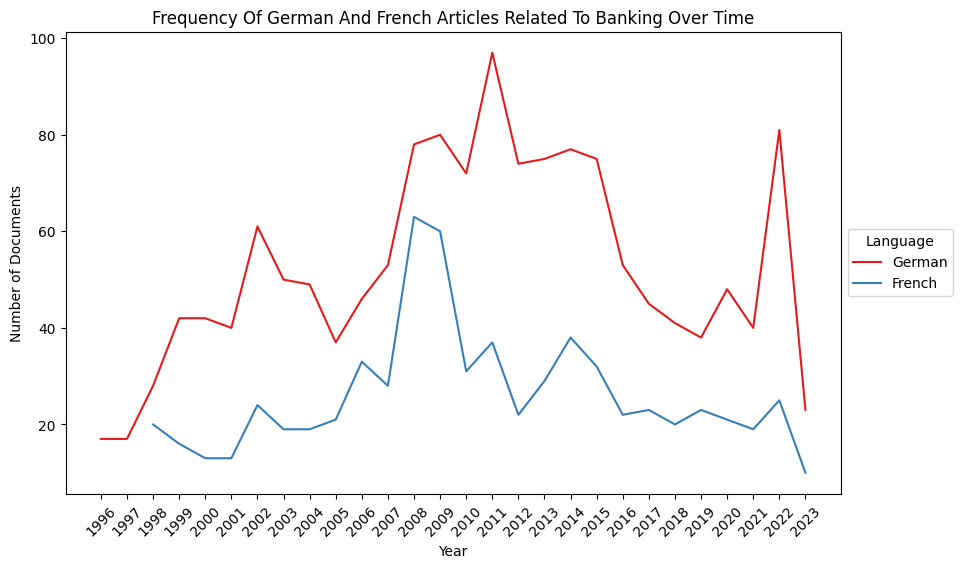

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to map topic numbers to names
topic_names = {
    0: 'German',
    1: 'French',
}

# Set the color palette
color_palette = sns.color_palette('Set1', n_colors=5)

# Create a custom legend handle with the corresponding colors
legend_handles = [plt.Line2D([], [], color=color_palette[i], label=topic_names[i]) for i in topic_names.keys()]



# Plot the line plot
plt.figure(figsize=(10, 6))
ax=sns.lineplot(data=grouped_df, x='year', y='document_count', hue='language', palette=color_palette)
plt.title('Frequency Of German And French Articles Related To Banking Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Documents')

# Highlight the line for the 'Bank' topic
bank_topic_color = color_palette[3]  # Get the color for the 'Bank' topic
bank_line = ax.get_lines()[3]  # Get the line object for the 'Bank' topic
bank_line.set_color(bank_topic_color)
bank_line.set_linewidth(8)

# Add the custom legend handle
plt.legend(title='Language', handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.5))

# Rotate the x-axis labels
plt.xticks(rotation=45)
plt.savefig('topic_trend_plot.png', bbox_inches='tight')
plt.show()



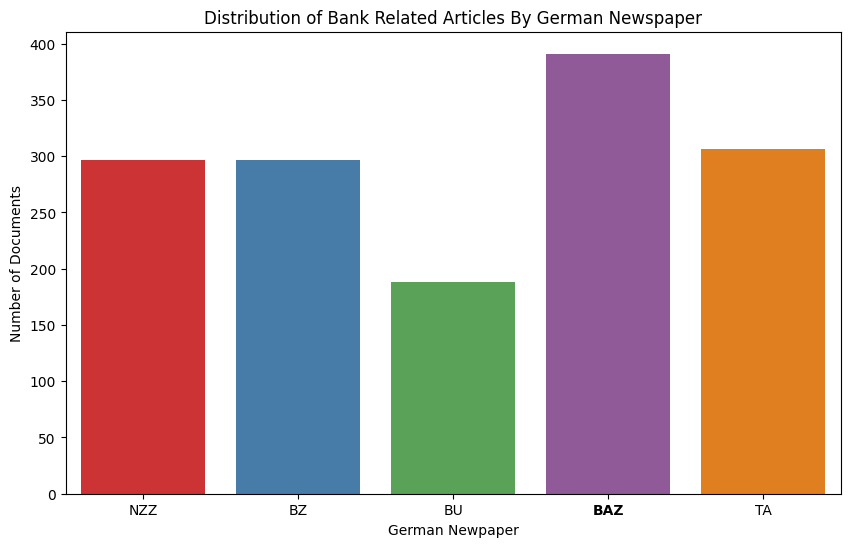

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Create a dictionary to map topic numbers to names
topic_names = german_newspapers

# Set the color palette
color_palette = sns.color_palette('Set1', n_colors=5)

# Group the dataframe by topic and language and count the number of documents
grouped_df = filted_dataset_after_topic_modeling_german.groupby(['newspaper']).size().reset_index(name='document_count')

# Plot the grouped bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_df, x='newspaper', y='document_count', palette=color_palette)
plt.title('Distribution of Bank Related Articles By German Newspaper')
plt.xlabel('German Newpaper')
plt.ylabel('Number of Documents')


# Highlight the 'Bank' xtick
bank_xtick_index = 3  # Index of 'Bank' xtick
bank_xtick_label = topic_names[bank_xtick_index]  # Label for 'Bank' xtick
bank_xtick = plt.gca().xaxis.get_ticklabels()[bank_xtick_index]  # Get 'Bank' xtick label
bank_xtick.set_fontweight('bold')  # Set font weight to bold
bank_xtick.set_fontproperties(fm.FontProperties(weight='bold'))  # Set font properties to bold

# Set the x-axis tick labels to topic names
plt.xticks(ticks=range(len(topic_names)), labels=[topic_names[i] for i in range(len(topic_names))])
plt.savefig('topic_newspaper_trend_plot_german.png', bbox_inches='tight')

plt.show()


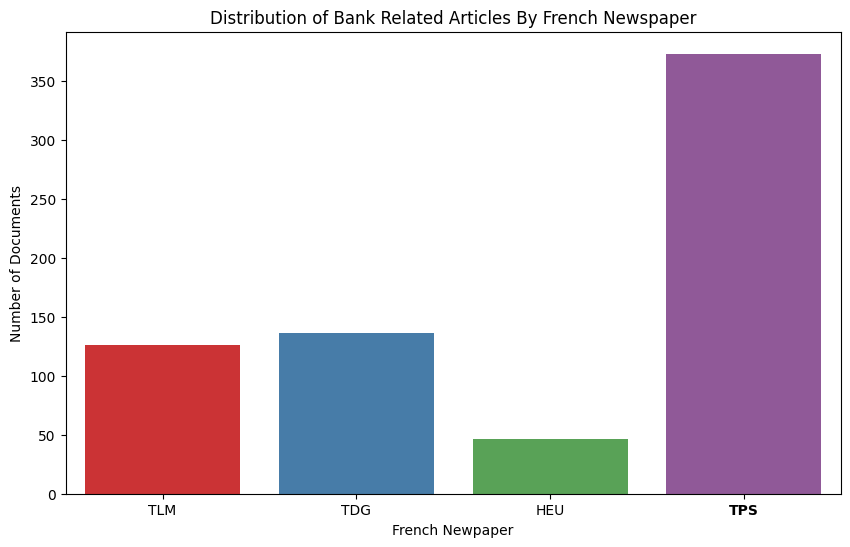

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# Create a dictionary to map topic numbers to names
topic_names = french_newspapers

# Set the color palette
color_palette = sns.color_palette('Set1', n_colors=5)

# Group the dataframe by topic and language and count the number of documents
grouped_df = filted_dataset_after_topic_modeling_french.groupby(['newspaper']).size().reset_index(name='document_count')

# Plot the grouped bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=grouped_df, x='newspaper', y='document_count', palette=color_palette)
plt.title('Distribution of Bank Related Articles By French Newspaper')
plt.xlabel('French Newpaper')
plt.ylabel('Number of Documents')


# Highlight the 'Bank' xtick
bank_xtick_index = 3  # Index of 'Bank' xtick
bank_xtick_label = topic_names[bank_xtick_index]  # Label for 'Bank' xtick
bank_xtick = plt.gca().xaxis.get_ticklabels()[bank_xtick_index]  # Get 'Bank' xtick label
bank_xtick.set_fontweight('bold')  # Set font weight to bold
bank_xtick.set_fontproperties(fm.FontProperties(weight='bold'))  # Set font properties to bold

# Set the x-axis tick labels to topic names
plt.xticks(ticks=range(len(topic_names)), labels=[topic_names[i] for i in range(len(topic_names))])
plt.savefig('topic_newspaper_trend_plot_french.png', bbox_inches='tight')
plt.show()

